### Lead Score Analysis

##### Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import warnings 
warnings.filterwarnings('ignore')

##### Data Importing

In [11]:
data_df = pd.read_csv("Leads.csv")
pd.options.display.max_columns = None

In [12]:
data_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Coloum analysis

In [13]:
data_df.shape

(9240, 37)

In [14]:
data_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [15]:
data_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [16]:
# data info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [17]:
# Missing data count
data_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [18]:
#Percentage of Missing value
round(data_df.isnull().sum()/data_df.shape[0]*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [19]:
# Converting the yes/no in data_df to 0 & 1

In [20]:
features_df = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 
       'Get updates on DM Content','I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']

for feature in features_df:
    data_df[feature] = data_df[feature].apply(lambda x : 1 if x.lower()=='yes' else 0)
data_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [21]:
data_df = data_df.replace('Select', np.nan)

##### Comparing the columns and changing the categorical variables

In [22]:
data_df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 5860 non-null   object
 6   How did you hear about X Education             1990 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [23]:
data_df.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9240 non-null   int64  
 1   Do Not Email                              9240 non-null   int64  
 2   Do Not Call                               9240 non-null   int64  
 3   Converted                                 9240 non-null   int64  
 4   TotalVisits                               9103 non-null   float64
 5   Total Time Spent on Website               9240 non-null   int64  
 6   Page Views Per Visit                      9103 non-null   float64
 7   Search                                    9240 non-null   int64  
 8   Magazine                                  9240 non-null   int64  
 9   Newspaper Article                         9240 non-null   int64  
 10  X Education Forums                  

In [24]:
data_df.select_dtypes(include='object').columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Last Notable Activity'],
      dtype='object')

In [25]:
obj_cols = data_df.select_dtypes(include='object').columns

In [26]:
for i in obj_cols:
    print('\n')
    print(i)
    print('-'*100)
    print(data_df[i].value_counts(normalize=True) * 100)
    print('-'*100)



Prospect ID
----------------------------------------------------------------------------------------------------
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.010823
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.010823
46befc49-253a-419b-abea-2fd978d2e2b1    0.010823
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.010823
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.010823
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.010823
644099a2-3da4-4d23-9546-7676340a372b    0.010823
2a093175-415b-4321-9e69-ed8d9df65a3c    0.010823
c66249a3-8500-4c66-a511-312d914573de    0.010823
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.010823
Name: proportion, Length: 9240, dtype: float64
----------------------------------------------------------------------------------------------------


Lead Origin
----------------------------------------------------------------------------------------------------
Lead Origin
Landing Page Submission    52.878788
API                   

In [27]:
threshold = 0.7
data_df_cleaned = data_df.loc[:, data_df.isnull().mean() <= threshold]
data_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [28]:
data_df_cleaned['Lead Quality'].describe

<bound method NDFrame.describe of 0        Low in Relevance
1                     NaN
2                Might be
3                Not Sure
4                Might be
              ...        
9235    High in Relevance
9236             Might be
9237             Not Sure
9238                  NaN
9239             Might be
Name: Lead Quality, Length: 9240, dtype: object>

In [29]:
data_df_cleaned['Lead Quality'].value_counts(dropna=False)

Lead Quality
NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [30]:
data_df_cleaned['Lead Quality'] = data_df_cleaned['Lead Quality'].replace(np.nan, 'Not Sure')

In [31]:
data_df_cleaned['Lead Quality'].value_counts(dropna=False)

Lead Quality
Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [32]:
# Counting the categories in categorical columns

def unique_value_counts(dataframe, columns):
    results = {}
    for column in columns:
        if column in dataframe.columns:
            results[column] = dataframe[column].nunique()
        else:
            results[column] = "Column not found"
    return results

In [33]:
unique_counts = unique_value_counts(data_df_cleaned, obj_cols)

for column, count in unique_counts.items():
    print(f"Column: {column}, Unique Values: {count}")

Column: Prospect ID, Unique Values: 9240
Column: Lead Origin, Unique Values: 5
Column: Lead Source, Unique Values: 21
Column: Last Activity, Unique Values: 17
Column: Country, Unique Values: 38
Column: Specialization, Unique Values: 18
Column: How did you hear about X Education, Unique Values: Column not found
Column: What is your current occupation, Unique Values: 6
Column: What matters most to you in choosing a course, Unique Values: 3
Column: Tags, Unique Values: 26
Column: Lead Quality, Unique Values: 5
Column: Lead Profile, Unique Values: Column not found
Column: City, Unique Values: 6
Column: Asymmetrique Activity Index, Unique Values: 3
Column: Asymmetrique Profile Index, Unique Values: 3
Column: Last Notable Activity, Unique Values: 16


In [34]:
# dropping irrelevent columns

data_df_cleaned = data_df_cleaned.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
                                        'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],axis=1)

In [35]:
data_df_cleaned['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [36]:
data_df_cleaned['City'] = data_df_cleaned['City'].replace(np.nan, 'Mumbai')

In [37]:
data_df_cleaned['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [38]:
data_df_cleaned['Specialization'] = data_df_cleaned['Specialization'].replace(np.nan, 'Others')

In [39]:
data_df_cleaned['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [40]:
data_df_cleaned['Tags'] = data_df_cleaned['Tags'].replace(np.nan, 'Will revert after reading the email')

In [41]:
data_df_cleaned['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [42]:
data_df_cleaned['What matters most to you in choosing a course'] = data_df_cleaned['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [43]:
data_df_cleaned['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [44]:
data_df_cleaned['What is your current occupation'] = data_df_cleaned['What is your current occupation'].replace(np.nan, 'Unemployed')

In [45]:
data_df_cleaned['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [46]:
data_df_cleaned['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [47]:
data_df_cleaned['Country'] = data_df_cleaned['Country'].replace(np.nan, 'India')

In [48]:
data_df_cleaned['Country'].value_counts(dropna=False)

Country
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [49]:
(data_df_cleaned.isnull().sum()/len(data_df_cleaned.index))*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [50]:
data_df_cleaned.dropna(inplace=True)

data_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   int64  
 5   Do Not Call                                    9074 non-null   int64  
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 non-n

In [56]:
data_df_cleaned['Lead Source'] = data_df_cleaned['Lead Source'].replace('google', 'Google')
data_df_cleaned['Lead Source'] = data_df_cleaned['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
                                                                        'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'youtubechannel', 
                                                                         'welearnblog_Home']
                                                                        , 'Other_Sources')

##### EDA

In [57]:
# Target variable is the Converted column
data_df_cleaned['Converted'].value_counts()

Converted
0    5639
1    3435
Name: count, dtype: int64

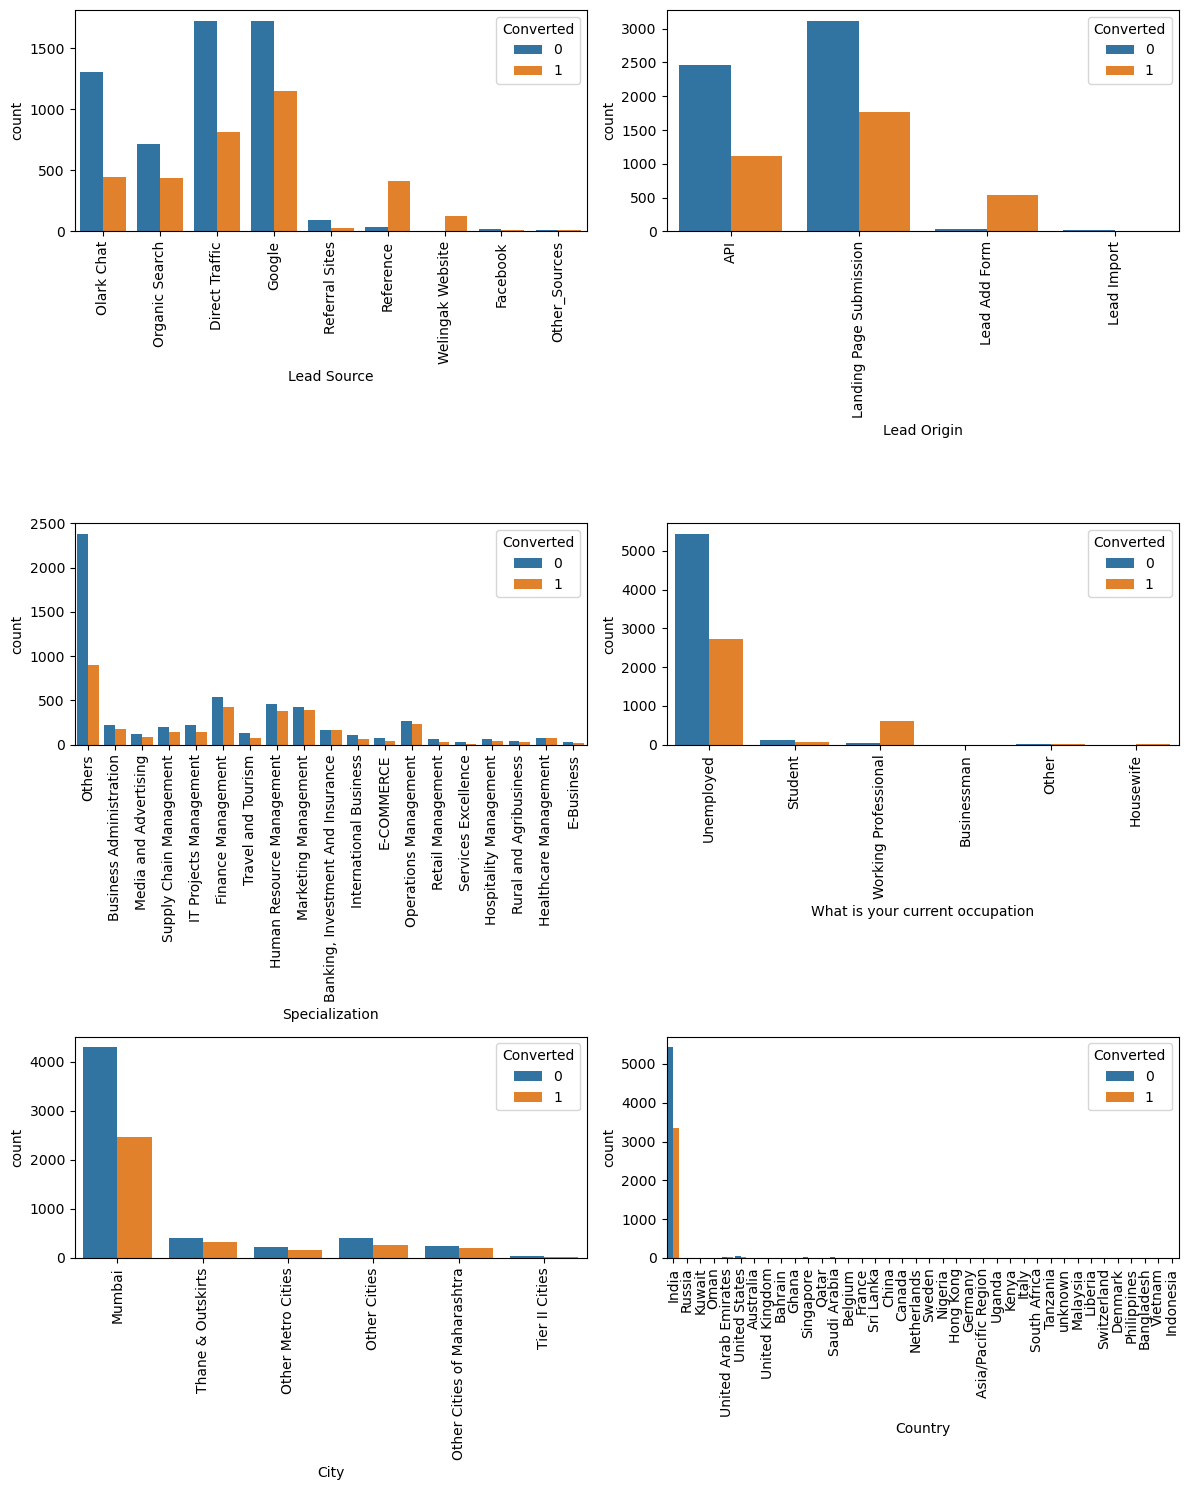

In [58]:
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()

for i, col in enumerate(['Lead Source', 'Lead Origin', 'Specialization', 'What is your current occupation', 'City', 'Country']):
    ax = axes[i]  # Access the subplot
    sns.countplot(data=data_df_cleaned, x=col, hue='Converted', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.subplots_adjust(hspace=2.0)

plt.tight_layout()
plt.show()

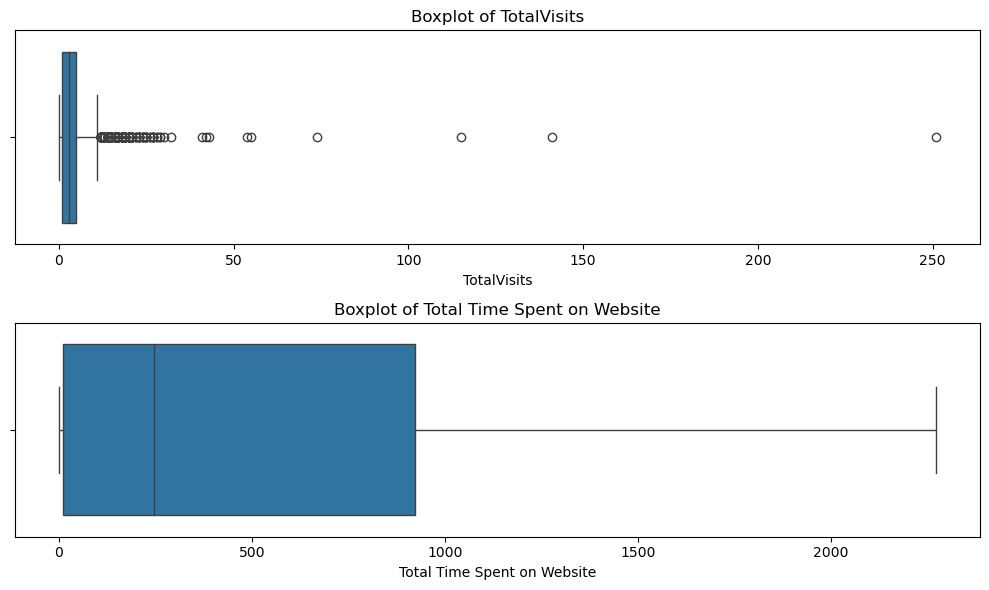

In [64]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
axes = axes.flatten()

for i, column in enumerate(['TotalVisits', 'Total Time Spent on Website']):
    sns.boxplot(data=data_df_cleaned, x=column, ax=axes[i])  
    axes[i].set_title(f"Boxplot of {column}")  

plt.subplots_adjust(hspace=2.0)  
plt.tight_layout()  
plt.show()